# Missing Values and Outliers

### Missing Values

Ref: 

Flexible Imputation of Missing Data, Stef van Braun (2018). Ed. 2.

https://stefvanbuuren.name/fimd/

Multivariate Data Analysis, Joseph F. Hair, William C. Black, Barry J. Babin, Rolph E. Anderson (2013). Ed. 7.

Problems w/ MVs:

     #1: reduction of the sample size available for analysis
     
     #2: bias resulting from differences between missing and complete data

#### Four-Step Process for Identifying Missing Data and Applying Remedies

Step 1: Determine the type of MVs

    Know the cause

    Ignorable MVs
    
         Specific design of the data collection process
         
         Censored data

Step 2:  Determine the extent of MVs

    How much MVs are OK? ---> can generally be ignored
         
         under 5% - 10% of observations are missed.
         
    Randomness
    
    Sufficient data for the selected analysis technique

Step 3:  Diagnose the randomness of the MVs processes

    Missing not at random (MNAR)
    
    Missing completely at random (MCAR)
    
    Missing at random (MAR) if the missing values of Y depend on X, but not on Y
    
Step 4:  Select the imputation method
    
    Imputation is the process of estimating the missing value    
    based on valid values of other variables and/or cases in the sample.
    
    Some imputation methods:
    
        -- Complete case approach
        
        -- Using all-available data
        
        -- Mean/Median substitution
        
        -- MICE (Multivariate Imputation by Chained Equations) algorithm
        
            step 1: For each variable, replace the missing value with a simple imputation strategy such as mean imputation, also considered as “placeholders.”
               
            step 2: The “placeholders” for the first variable, X1, are regressed by using machine learning where X1 is the dependent variable, and the rest of the variables are the                            independent variables. The process continues as such until all the variables are                      considered at least once as the dependent variable.
            
            step 3: Those original “placeholders” are then replaced with the predictions from the model.
            
            step 4: The replacement process is repeated for a number of cycles which is generally ten, according to Raghunathan et al. 2002, and the imputation is updated at each cycle.
            
            step 5: At the end of the cycle, the missing values are ideally replaced with the prediction values that best reflect the relationships identified in the data.

### Business Undestanding

### Initial Setup

Goal:

Survey analysis: calculate Pearson correlaion w/ missing values

In [1]:
#Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data from file
data = pd.read_csv('cs_02.csv')
data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,201,3.3,0.9,8.6,4,2.1,1.8,6.3,41,4.5,0,1,0,0,2
1,202,.,0.4,4,2.5,1.2,1.7,5.2,35,3.3,0,1,0,0,1
2,203,3,1,9.1,7.1,3.5,3.4,.,55,5.2,0,1,1,0,3
3,204,.,2.5,8.1,3.1,4,1.9,5.4,51,3.9,0,0,0,1,3
4,205,5.1,1.4,7.1,4.8,3.3,2.6,3.8,49,4.9,0,1,0,0,2


In [3]:
data.shape

(79, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      79 non-null     int64 
 1   V1      79 non-null     object
 2   V2      79 non-null     object
 3   V3      79 non-null     object
 4   V4      79 non-null     object
 5   V5      79 non-null     object
 6   V6      79 non-null     object
 7   V7      79 non-null     object
 8   V8      79 non-null     object
 9   V9      79 non-null     object
 10  V10     79 non-null     object
 11  V11     79 non-null     object
 12  V12     79 non-null     int64 
 13  V13     79 non-null     int64 
 14  V14     79 non-null     int64 
dtypes: int64(4), object(11)
memory usage: 9.4+ KB


In [5]:
#Step 1: Determine the type of MVs
#Know the cause
np.sum(data.isnull())

ID     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
dtype: int64

In [6]:
np.sum(data == '.')

ID      0
V1     19
V2     11
V3      5
V4      5
V5      4
V6      3
V7      5
V8      4
V9      3
V10     2
V11     1
V12     0
V13     0
V14     0
dtype: int64

In [7]:
data[data == '.'] = np.nan

In [8]:
np.sum(data.isnull())

ID      0
V1     19
V2     11
V3      5
V4      5
V5      4
V6      3
V7      5
V8      4
V9      3
V10     2
V11     1
V12     0
V13     0
V14     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      79 non-null     int64 
 1   V1      60 non-null     object
 2   V2      68 non-null     object
 3   V3      74 non-null     object
 4   V4      74 non-null     object
 5   V5      75 non-null     object
 6   V6      76 non-null     object
 7   V7      74 non-null     object
 8   V8      75 non-null     object
 9   V9      76 non-null     object
 10  V10     77 non-null     object
 11  V11     78 non-null     object
 12  V12     79 non-null     int64 
 13  V13     79 non-null     int64 
 14  V14     79 non-null     int64 
dtypes: int64(4), object(11)
memory usage: 9.4+ KB


In [10]:
#Change data type of columns
data[data.columns[1 : ]] = data.iloc[:, 1 : ].apply(lambda col: col.astype('float'), axis = 0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      79 non-null     int64  
 1   V1      60 non-null     float64
 2   V2      68 non-null     float64
 3   V3      74 non-null     float64
 4   V4      74 non-null     float64
 5   V5      75 non-null     float64
 6   V6      76 non-null     float64
 7   V7      74 non-null     float64
 8   V8      75 non-null     float64
 9   V9      76 non-null     float64
 10  V10     77 non-null     float64
 11  V11     78 non-null     float64
 12  V12     79 non-null     float64
 13  V13     79 non-null     float64
 14  V14     79 non-null     float64
dtypes: float64(14), int64(1)
memory usage: 9.4 KB


In [12]:
#Step 2: Determine the extent of MVs
#Summary of MVs in each column
mvs_summary = pd.DataFrame({'freq' : np.sum(data.isnull())})
mvs_summary['pct'] = round(mvs_summary['freq'] / data.shape[0] * 100, 1)
mvs_summary.sort_values(by = 'pct', ascending = False)

,freq,pct
V1,19,24.1
V2,11,13.9
V3,5,6.3
V4,5,6.3
V7,5,6.3
V5,4,5.1
V8,4,5.1
V6,3,3.8
V9,3,3.8
V10,2,2.5


In [13]:
#Summary of MVs for each case
data.loc[:, 'mvs'] = data.apply(lambda row: np.sum(row.isnull()), axis = 1)
data.sort_values(by = 'mvs', ascending = False)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,mvs
9,210,4.1,3.7,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,2.0,7
60,261,3.6,NaN,NaN,6.2,4.5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,2.0,7
62,263,3.6,NaN,9.9,NaN,NaN,NaN,NaN,NaN,4.9,NaN,1.0,0.0,0.0,3.0,7
24,225,4.7,1.3,NaN,NaN,3.0,2.6,6.8,54.0,5.9,0.0,1.0,0.0,0.0,3.0,2
47,248,NaN,NaN,6.4,5.3,3.0,2.5,7.1,46.0,4.5,1.0,0.0,1.0,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,236,2.9,2.6,7.7,7.0,2.8,3.6,7.7,47.0,4.2,0.0,1.0,1.0,1.0,2.0,0
38,239,4.3,1.8,7.6,5.4,3.1,2.5,4.4,46.0,5.6,0.0,1.0,0.0,1.0,3.0,0
41,242,5.1,1.9,9.2,5.8,3.6,2.3,4.5,60.0,6.1,0.0,1.0,0.0,0.0,3.0,0
42,243,4.1,1.1,9.3,5.5,2.5,2.7,7.4,47.0,5.3,0.0,1.0,0.0,1.0,3.0,0


In [14]:
#Decision: remove V1 and cases with 50% mvs
data.drop(columns = 'V1', inplace = True)
data.drop(index = [9, 60, 62], inplace = True)

In [15]:
#Summary of MVs in each column
mvs_summary = pd.DataFrame({'freq' : np.sum(data.isnull())})
mvs_summary['pct'] = round(mvs_summary['freq'] / data.shape[0] * 100, 1)
mvs_summary.sort_values(by = 'pct', ascending = False)

,freq,pct
V2,9,11.8
V3,4,5.3
V4,3,3.9
V5,2,2.6
V7,2,2.6
V8,1,1.3
V9,1,1.3
ID,0,0.0
V6,0,0.0
V10,0,0.0


In [16]:
#Step 3: Diagnose the randomness of the MVs processes
#Create a list of conditions
conditions = [data['V2'].isnull(), data['V2'].notnull()]
#Create a list of the values needed to assign for each condition
values = [1, 0]
#Create a new column and use np.select to assign values to it using the lists as arguments
data['if_v2_null'] = np.select(conditions, values)
data.tail()

,ID,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,mvs,if_v2_null
74,275,NaN,9.9,6.5,3.0,2.7,6.9,58.0,6.0,0.0,1.0,0.0,0.0,3.0,1,1
75,276,0.7,8.1,6.0,2.2,2.1,8.4,40.0,5.0,0.0,1.0,1.0,0.0,2.0,0,0
76,277,2.4,9.6,5.0,3.3,3.2,8.5,47.0,5.2,0.0,1.0,0.0,1.0,2.0,0,0
77,278,NaN,8.8,5.3,3.5,2.5,7.1,71.0,6.2,0.0,1.0,1.0,0.0,3.0,1,1
78,279,2.6,9.9,3.5,3.2,1.2,5.4,43.0,5.0,0.0,1.0,0.0,1.0,3.0,0,0


In [17]:
#Evaluate the randomness of the MVs in V2 from V3 perspective
print(round(data.loc[data['if_v2_null'] == 0, 'V3'].mean(), 1))
print(round(data.loc[data['if_v2_null'] == 1, 'V3'].mean(), 1))

7.9
7.4


In [18]:
#T-test for the means of two independent samples
    #H0: mu_1 = mu_2
    #H1: mu_1 # mu_2
#If p-value < 0.05 reject H0
#Note : Normality assumption is needed.
from scipy.stats import ttest_ind
ttest_ind(data.loc[(data['if_v2_null'] == 0) & (data['V3'].notnull()), 'V3'],
          data.loc[(data['if_v2_null'] == 1) & (data['V3'].notnull()), 'V3'],
          alternative = 'two-sided')

Ttest_indResult(statistic=0.8458114458768, pvalue=0.40053997816689313)

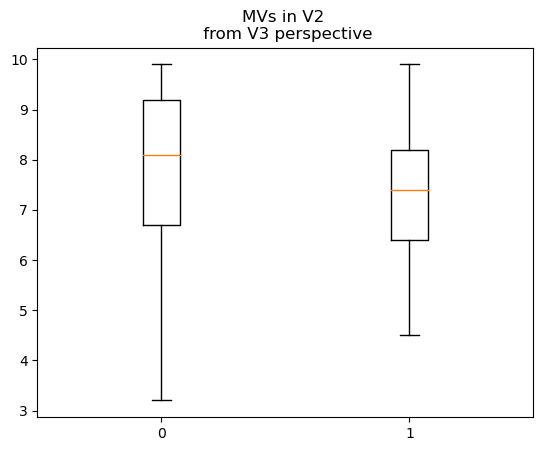

In [19]:
#Box plot for evaluating the randomness of the MVs in V2 from V3 perspective
plt.boxplot([data.loc[(data['if_v2_null'] == 0) & (data['V3'].notnull()), 'V3'],
             data.loc[(data['if_v2_null'] == 1) & (data['V3'].notnull()), 'V3']])
plt.xticks(ticks = [1, 2], labels = [0, 1])
plt.title('MVs in V2 \n from V3 perspective')
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 78
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          76 non-null     int64  
 1   V2          67 non-null     float64
 2   V3          72 non-null     float64
 3   V4          73 non-null     float64
 4   V5          74 non-null     float64
 5   V6          76 non-null     float64
 6   V7          74 non-null     float64
 7   V8          75 non-null     float64
 8   V9          75 non-null     float64
 9   V10         76 non-null     float64
 10  V11         76 non-null     float64
 11  V12         76 non-null     float64
 12  V13         76 non-null     float64
 13  V14         76 non-null     float64
 14  mvs         76 non-null     int64  
 15  if_v2_null  76 non-null     int32  
dtypes: float64(13), int32(1), int64(2)
memory usage: 9.8 KB


In [21]:
#Evaluate the randomness of the MVs in V2 from other numeric variables perspective
mvs_in_v2 = pd.DataFrame({'var' : data.columns[2 : 9],
                          'v2_null' : [0] * 7,
                          'v2_not_null' : [0] * 7})
for i in range(2, 9):
    mvs_in_v2.iloc[i - 2, 1] = round(data.loc[data['if_v2_null'] == 1, data.columns[i]].mean(), 1)
    mvs_in_v2.iloc[i - 2, 2] = round(data.loc[data['if_v2_null'] == 0, data.columns[i]].mean(), 1)
mvs_in_v2

,var,v2_null,v2_not_null
0,V3,7.4,7.9
1,V4,6.1,5.1
2,V5,3.5,3.0
3,V6,3.1,2.6
4,V7,8.0,6.8
5,V8,52.4,46.7
6,V9,5.1,4.8


In [22]:
#Evaluate the randomness of the MVs in V2 from V10 perspective
#Cross tabulation analysis
cross_tab = round(pd.crosstab(data['V10'], data['if_v2_null']), 2)
cross_tab

if_v2_null,0,1
V10,,
0.0,50,6
1.0,17,3


In [23]:
#Evaluate the randomness of the MVs in V2 from V10 perspective
#Cross tabulation analysis
cross_tab_pct = round(pd.crosstab(data['V10'], data['if_v2_null'], normalize = 'index'), 2)
cross_tab_pct

if_v2_null,0,1
V10,,
0.0,0.89,0.11
1.0,0.85,0.15


In [24]:
#Two categorical variables
#Chi-Square test for cross tab
    #H0: MVs in V2 are independent from V10
    #H1: MVs in V2 are related to V10
#If p-value < 0.05 reject H0
from scipy.stats import chi2_contingency
chi2_contingency(cross_tab)

Chi2ContingencyResult(statistic=0.01125325752191425, pvalue=0.9155177905952596, dof=1, expected_freq=array([[49.36842105,  6.63157895],
       [17.63157895,  2.36842105]]))

In [25]:
#Remove temporary variables: mvs and if_v2_null
data.drop(columns = ['mvs', 'if_v2_null'], inplace = True)
data.head()

,ID,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,201,0.9,8.6,4.0,2.1,1.8,6.3,41.0,4.5,0.0,1.0,0.0,0.0,2.0
1,202,0.4,4.0,2.5,1.2,1.7,5.2,35.0,3.3,0.0,1.0,0.0,0.0,1.0
2,203,1.0,9.1,7.1,3.5,3.4,NaN,55.0,5.2,0.0,1.0,1.0,0.0,3.0
3,204,2.5,8.1,3.1,4.0,1.9,5.4,51.0,3.9,0.0,0.0,0.0,1.0,3.0
4,205,1.4,7.1,4.8,3.3,2.6,3.8,49.0,4.9,0.0,1.0,0.0,0.0,2.0


In [26]:
#Step 4: Select the imputation method
#Create a dataframe to save mean of numeric variables 
# for different imputation methods
mean_imput_methods = pd.DataFrame({'var' : data.columns[1 : 9],
                                   'comp_case' : [0] * 8,
                                   'mean_sub': [0] * 8,
                                   'mice': [0] * 8})
mean_imput_methods

,var,comp_case,mean_sub,mice
0,V2,0,0,0
1,V3,0,0,0
2,V4,0,0,0
3,V5,0,0,0
4,V6,0,0,0
5,V7,0,0,0
6,V8,0,0,0
7,V9,0,0,0


In [27]:
#Create a dataframe to save std of numeric variables 
# for different imputation methods
std_imput_methods = pd.DataFrame({'var' : data.columns[1 : 9],
                                  'comp_case' : [0] * 8,
                                  'mean_sub': [0] * 8,
                                  'mice': [0] * 8})
std_imput_methods

,var,comp_case,mean_sub,mice
0,V2,0,0,0
1,V3,0,0,0
2,V4,0,0,0
3,V5,0,0,0
4,V6,0,0,0
5,V7,0,0,0
6,V8,0,0,0
7,V9,0,0,0


In [28]:
#Method 1: complete case approach
data_complete_case = data.dropna(axis = 0, inplace = False)
print(data_complete_case.shape)
np.sum(data_complete_case.isnull())

(56, 14)


ID     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
dtype: int64

In [29]:
mean_imput_methods['comp_case'] = list(round(data_complete_case.iloc[:, 1 : 9].mean(), 2))
mean_imput_methods

,var,comp_case,mean_sub,mice
0,V2,2.04,0,0
1,V3,7.93,0,0
2,V4,5.08,0,0
3,V5,3.00,0,0
4,V6,2.56,0,0
5,V7,6.80,0,0
6,V8,46.95,0,0
7,V9,4.81,0,0


In [30]:
std_imput_methods['comp_case'] = list(round(data_complete_case.iloc[:, 1 : 9].std(), 2))
std_imput_methods

,var,comp_case,mean_sub,mice
0,V2,0.90,0,0
1,V3,1.56,0,0
2,V4,1.22,0,0
3,V5,0.89,0,0
4,V6,0.73,0,0
5,V7,1.66,0,0
6,V8,9.12,0,0
7,V9,0.91,0,0


In [31]:
#Method 2: mean substitution
data_mean_sub = data.copy()

In [32]:
#Substiude NAs w/ mean of each column
data_mean_sub.iloc[:, 1 : 9] = data_mean_sub.iloc[:, 1 : 9].fillna(data_mean_sub.iloc[:, 1 : 9].mean())
print(data_mean_sub.shape)
np.sum(data_mean_sub.isnull())

(76, 14)


ID     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
dtype: int64

In [33]:
mean_imput_methods['mean_sub'] = list(round(data_mean_sub.iloc[:, 1 : 9].mean(), 2))
mean_imput_methods

,var,comp_case,mean_sub,mice
0,V2,2.04,1.98,0
1,V3,7.93,7.79,0
2,V4,5.08,5.20,0
3,V5,3.00,3.04,0
4,V6,2.56,2.62,0
5,V7,6.80,6.90,0
6,V8,46.95,47.37,0
7,V9,4.81,4.87,0


In [34]:
std_imput_methods['mean_sub'] = list(round(data_mean_sub.iloc[:, 1 : 9].std(), 2))
std_imput_methods

,var,comp_case,mean_sub,mice
0,V2,0.90,0.83,0
1,V3,1.56,1.60,0
2,V4,1.22,1.20,0
3,V5,0.89,0.84,0
4,V6,0.73,0.74,0
5,V7,1.66,1.58,0
6,V8,9.12,9.19,0
7,V9,0.91,0.87,0


In [35]:
#Method 3: MICE
#%pip install miceforest (uses lightgbm as a backend)
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(data = data, save_all_iterations = True, random_state = 123)
#Run the kernel on the data for 5 iterations
mice_kernel.mice(5)
#Create the imputed data
data_mice_imputation = mice_kernel.complete_data()
print(data_mice_imputation.shape)
np.sum(data_mice_imputation.isnull())

(76, 14)


ID     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
dtype: int64

In [36]:
mean_imput_methods['mice'] = list(round(data_mice_imputation.iloc[:, 1 : 9].mean(), 2))
mean_imput_methods

,var,comp_case,mean_sub,mice
0,V2,2.04,1.98,2.04
1,V3,7.93,7.79,7.80
2,V4,5.08,5.20,5.19
3,V5,3.00,3.04,3.04
4,V6,2.56,2.62,2.62
5,V7,6.80,6.90,6.89
6,V8,46.95,47.37,47.33
7,V9,4.81,4.87,4.86


In [37]:
std_imput_methods['mice'] = list(round(data_mice_imputation.iloc[:, 1 : 9].std(), 2))
std_imput_methods

,var,comp_case,mean_sub,mice
0,V2,0.90,0.83,0.88
1,V3,1.56,1.60,1.64
2,V4,1.22,1.20,1.21
3,V5,0.89,0.84,0.84
4,V6,0.73,0.74,0.74
5,V7,1.66,1.58,1.59
6,V8,9.12,9.19,9.20
7,V9,0.91,0.87,0.88


In [38]:
#Step 5: correlation analysis
#Method 1: complete case approach
round(data_complete_case.iloc[:, 1 : 9].corr(), 2)

,V2,V3,V4,V5,V6,V7,V8,V9
V2,1.00,-0.08,0.11,0.39,0.20,0.29,0.13,-0.30
V3,-0.08,1.00,-0.03,0.03,-0.19,-0.24,0.48,0.68
V4,0.11,-0.03,1.00,0.20,0.75,0.43,0.16,0.19
V5,0.39,0.03,0.20,1.00,0.19,-0.01,0.42,0.11
V6,0.20,-0.19,0.75,0.19,1.00,0.49,0.14,0.04
V7,0.29,-0.24,0.43,-0.01,0.49,1.00,-0.22,-0.33
V8,0.13,0.48,0.16,0.42,0.14,-0.22,1.00,0.48
V9,-0.30,0.68,0.19,0.11,0.04,-0.33,0.48,1.00


In [39]:
#Method 2: mean substitution
round(data_mean_sub.iloc[:, 1 : 9].corr(), 2)

,V2,V3,V4,V5,V6,V7,V8,V9
V2,1.00,-0.10,0.07,0.37,0.16,0.24,0.12,-0.29
V3,-0.10,1.00,-0.03,0.05,-0.18,-0.19,0.50,0.61
V4,0.07,-0.03,1.00,0.26,0.76,0.40,0.22,0.24
V5,0.37,0.05,0.26,1.00,0.26,0.04,0.47,0.17
V6,0.16,-0.18,0.76,0.26,1.00,0.43,0.21,0.09
V7,0.24,-0.19,0.40,0.04,0.43,1.00,-0.13,-0.24
V8,0.12,0.50,0.22,0.47,0.21,-0.13,1.00,0.53
V9,-0.29,0.61,0.24,0.17,0.09,-0.24,0.53,1.00


In [40]:
#Method 3: MICE
round(data_mice_imputation.iloc[:, 1 : 9].corr(), 2)

,V2,V3,V4,V5,V6,V7,V8,V9
V2,1.00,-0.12,0.12,0.40,0.22,0.32,0.13,-0.27
V3,-0.12,1.00,-0.01,0.08,-0.14,-0.15,0.53,0.64
V4,0.12,-0.01,1.00,0.26,0.77,0.41,0.23,0.24
V5,0.40,0.08,0.26,1.00,0.27,0.05,0.47,0.20
V6,0.22,-0.14,0.77,0.27,1.00,0.43,0.21,0.10
V7,0.32,-0.15,0.41,0.05,0.43,1.00,-0.11,-0.24
V8,0.13,0.53,0.23,0.47,0.21,-0.11,1.00,0.55
V9,-0.27,0.64,0.24,0.20,0.10,-0.24,0.55,1.00


In [41]:
#Summary
#   The missing data process is MCAR
#   Imputation is the most logical course of action
#   Correlations differ slightly across imputation techniques

### Outliers

Problems w/ Outliers:
    
    #1: can have a marked effect on any type of empirical analysis

    #2: how representative the outlier is of the population

Sources of their uniqueness:
     
     procedural error
     
     extraordinary event
     
     extraordinary observations
    
     unique in combination of values across the variables

In [42]:
#Problem of Masking
x = np.array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1000])
y = np.array([2, 2, 3, 3, 3, 4, 4, 4, 10000, 100000])

In [43]:
#Classic method for outlier detection
#|(x - mean)/ sd| > 3
print(abs((x - np.mean(x))/ np.std(x) > 3))
print(abs((y - np.mean(y))/ np.std(y) > 3))

[False False False False False False False False False False False False
 False False False  True]
[False False False False False False False False False False]


In [44]:
#Tukey's method
from scipy.stats import iqr
#x > q(0.75) + 1.5 * IQR(x)
#x < q(0.25) - 1.5 * IQR(x)
print(x > np.quantile(x, 0.75) + 1.5 * iqr(x))
print(y > np.quantile(y, 0.75) + 1.5 * iqr(y))

[False False False False False False False False False False False False
 False False False  True]
[False False False False False False False False  True  True]
